# Mobile Price Classfication 

## Importing Dependencies 

In [62]:
# Data Manipulation and Data Visualization
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Model Evaluator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


# Machine Learning models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from catboost import Pool

# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

## Exploratory Data Analysis 

### Load the data 

In [2]:
mobile_train = pd.read_csv("../Data/train.csv") 
mobile_test = pd.read_csv("../Data/test.csv")

mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
mobile_test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


### Inspecting the data 

In [4]:
mobile_train.shape

(2000, 21)

In [5]:
# Checking Data types of the data
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Checking Unique values
mobile_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [7]:
mobile_train.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [8]:
mobile_train["price_range"].value_counts(normalize=True)

0    0.25
1    0.25
2    0.25
3    0.25
Name: price_range, dtype: float64

In [9]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Checking Relationship between the Variables

In [10]:
corr = mobile_train.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


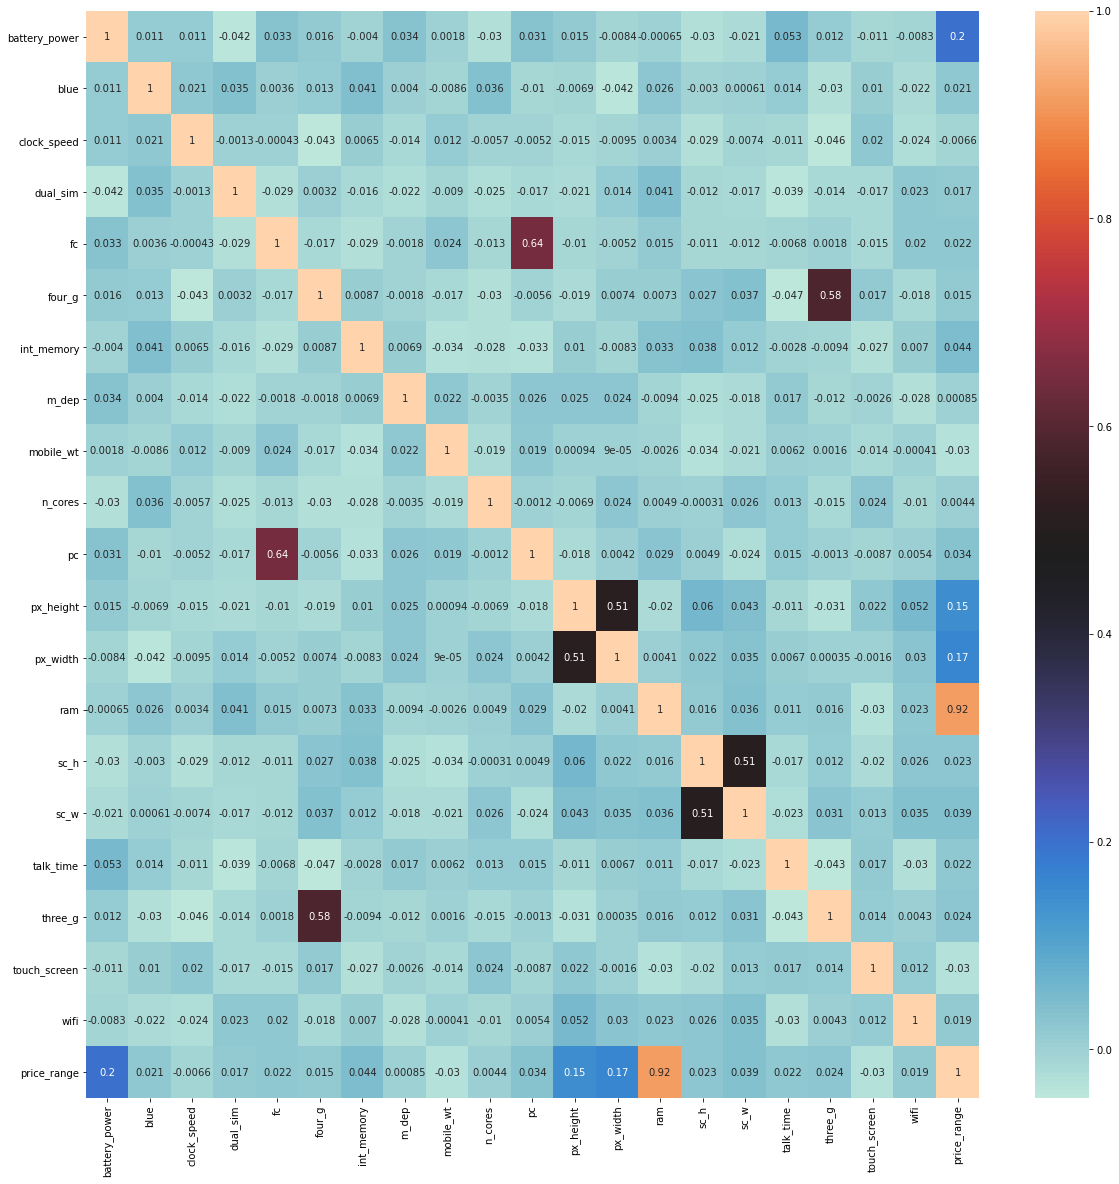

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, ax=ax, cmap="icefire");

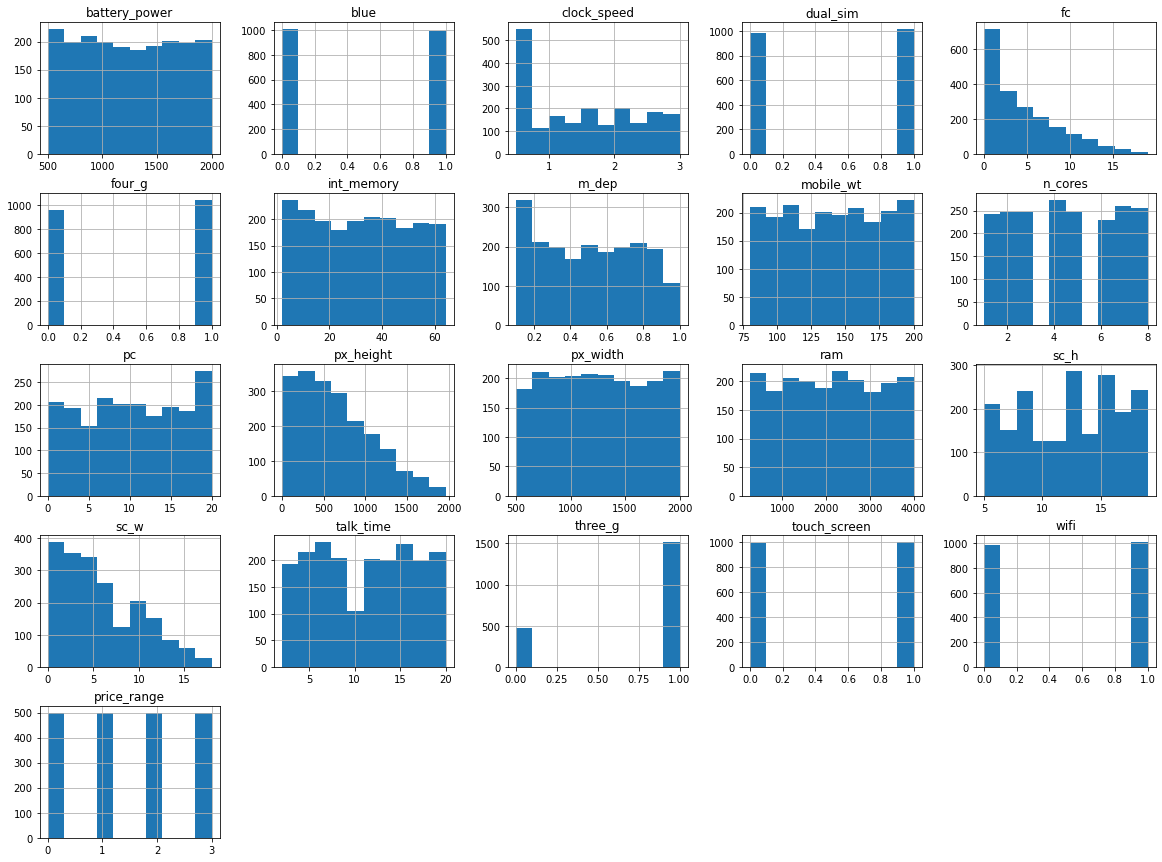

In [12]:
mobile_train.hist(figsize=(20, 15));

In [13]:
def plot_rel(x, y, index, col1, col2): 
    fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 6), ncols = 2, nrows=2)

    ax.bar(x[index == 0], y[index == 0], color=["salmon"])

    ax2.bar(x[index == 1], y[index == 1], color=["lightblue"])

    ax3.bar(x[index == 2], y[index == 2], color=["lightgreen"])

    ax4.bar(x[index == 3], y[index == 3])

    ax.set(xlabel=col1, ylabel=col2)
    ax2.set(xlabel=col1, ylabel=col2)
    ax3.set(xlabel=col1, ylabel=col2)
    ax4.set(xlabel=col1, ylabel=col2)
    plt.show()
    
def specs_rel(x, y, x_name, y_name): 
    plt.barh(y, x, color=["lightblue"])
    plt.yticks(y)
    plt.xlabel(x_name)
    plt.ylabel(y_name);

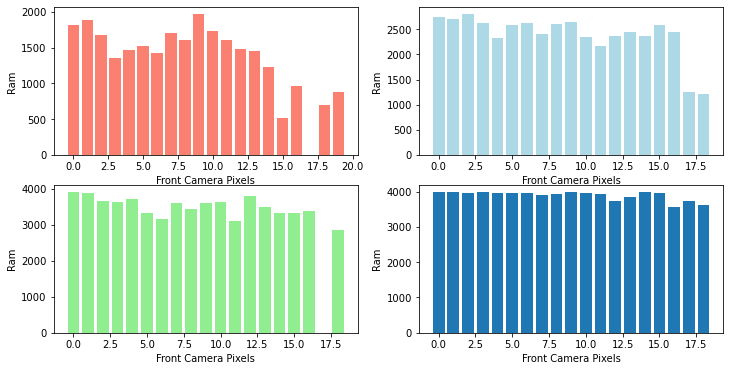

In [14]:
plot_rel(mobile_train.fc, mobile_train.ram, mobile_train["price_range"], "Front Camera Pixels", "Ram")

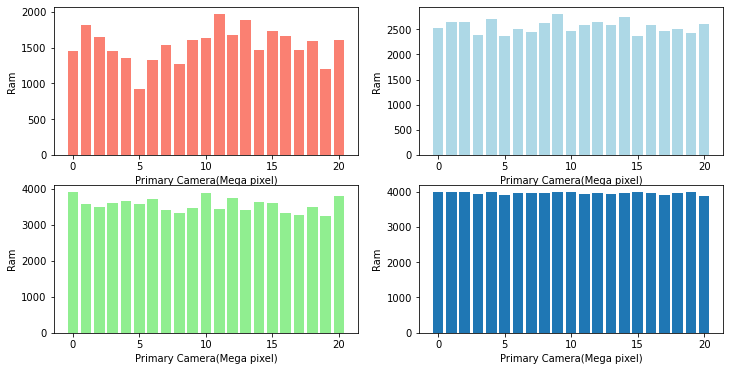

In [15]:
plot_rel(mobile_train.pc, mobile_train.ram, mobile_train["price_range"], "Primary Camera(Mega pixel)", "Ram")

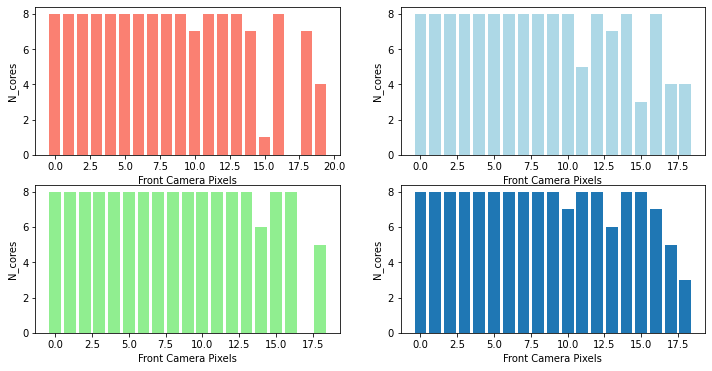

In [16]:
plot_rel(mobile_train.fc, mobile_train.n_cores, mobile_train["price_range"], "Front Camera Pixels", "N_cores")

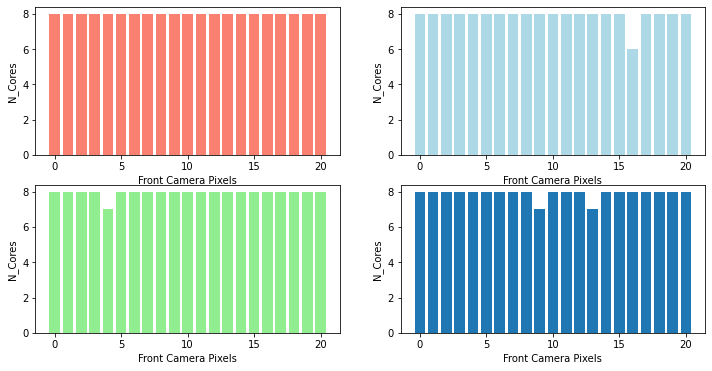

In [17]:
plot_rel(mobile_train.pc, mobile_train.n_cores, mobile_train["price_range"], "Front Camera Pixels", "N_Cores")

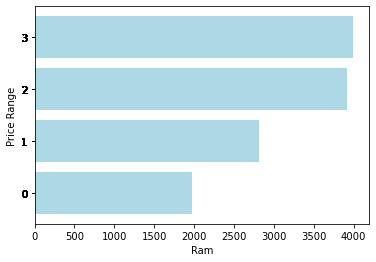

In [18]:
specs_rel(mobile_train["ram"], mobile_train["price_range"], "Ram", "Price Range")

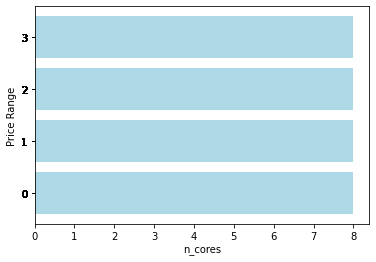

In [19]:
specs_rel(mobile_train["n_cores"], mobile_train["price_range"], "n_cores", "Price Range")

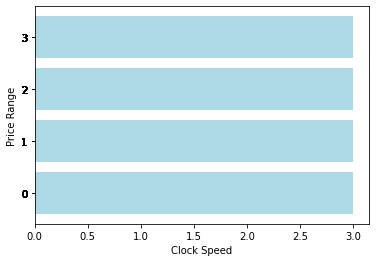

In [20]:
specs_rel(mobile_train["clock_speed"], mobile_train["price_range"], "Clock Speed", "Price Range")

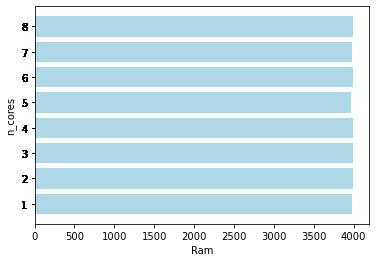

In [21]:
specs_rel(mobile_train["ram"], mobile_train["n_cores"], "Ram", "n_cores")

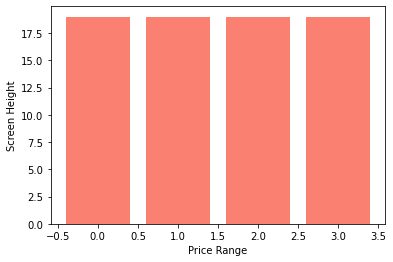

In [22]:
plt.bar(mobile_train["price_range"], mobile_train["sc_h"], color=["salmon"])
plt.xlabel("Price Range")
plt.ylabel("Screen Height");

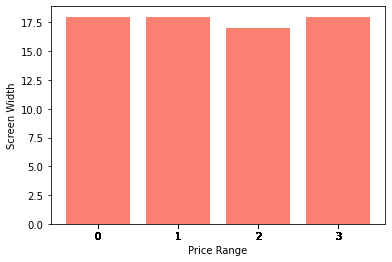

In [23]:
plt.bar(mobile_train["price_range"], mobile_train["sc_w"], color=["salmon"])
plt.xlabel("Price Range")
plt.ylabel("Screen Width")
plt.xticks(mobile_train["price_range"]);

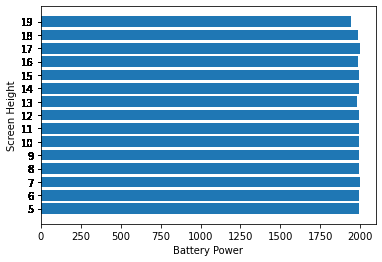

In [24]:
plt.barh(mobile_train["sc_h"], mobile_train["battery_power"])

plt.yticks(mobile_train["sc_h"])
plt.xlabel("Battery Power")
plt.ylabel("Screen Height");

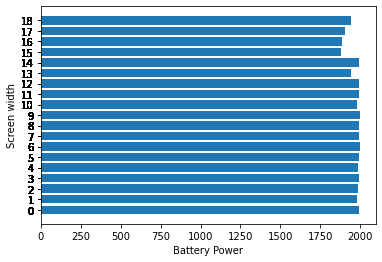

In [25]:
plt.barh(mobile_train["sc_w"], mobile_train["battery_power"])

plt.yticks(mobile_train["sc_w"])
plt.xlabel("Battery Power")
plt.ylabel("Screen width");

### Cleaning the data

In [26]:
mobile_train = mobile_train.drop("m_dep", axis=1)

In [27]:
mobile_test = mobile_test.drop("m_dep", axis=1)

In [28]:
mobile_train[mobile_train["sc_w"] == 0]
mobile_train.loc[mobile_train["sc_w"] == 0, "sc_w"] = mobile_train["sc_w"].median()

In [29]:
mobile_test[mobile_test["sc_w"] == 0]
mobile_test.loc[mobile_test["sc_w"] == 0, "sc_w"] = mobile_test["sc_w"].median()

In [30]:
mobile_train.tail()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10.0,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,168,6,16,483,754,3919,19,4.0,2,1,1,1,3


In [31]:
mobile_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7.0,2,0,1,0
1,2,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,5.0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10.0,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,5.0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8.0,7,1,0,1


In [32]:
mobile_train["sc_a"] = mobile_train["sc_h"] * mobile_train["sc_w"] 
mobile_train.drop(["sc_h", "sc_w"], axis=1, inplace=True)

In [33]:
mobile_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
sc_a             float64
dtype: object

In [34]:
mobile_test["sc_a"] = mobile_test["sc_h"] * mobile_test["sc_w"] 
mobile_test.drop(["sc_h", "sc_w"], axis=1, inplace=True)

In [35]:
mobile_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
sc_a             float64
dtype: object

In [36]:
corr = mobile_train.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_a
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,0.052510,0.011522,-0.010516,-0.008343,0.200723,-0.021506
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,0.013934,-0.030236,0.010061,-0.021863,0.020573,-0.016357
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.011432,-0.046433,0.019756,-0.024471,-0.006606,-0.005904
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.039404,-0.014008,-0.017117,0.022740,0.017444,-0.009768
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.006829,0.001793,-0.014828,0.020085,0.021998,-0.013658
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,-0.046628,0.584246,0.016758,-0.017620,0.014772,0.034049
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,-0.002790,-0.009366,-0.026999,0.006993,0.044435,0.021295
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,0.006209,0.001551,-0.014368,-0.000409,-0.030302,-0.034134
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,0.013148,-0.014733,0.023774,-0.009964,0.004399,0.018519
pc,0.031441,-0.009952,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.014657,-0.001322,-0.008742,0.005389,0.033599,-0.008482


## Modeling   

In [37]:
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_a
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,19,0,0,1,1,63.0
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,7,1,1,0,2,51.0
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,9,1,1,0,2,22.0
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,11,1,0,0,2,128.0
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,15,1,1,0,1,16.0


In [38]:
X = mobile_train.drop("price_range", axis=1)
y = mobile_train["price_range"]

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape

((1600, 18), (400, 18))

### Functions for modeling 

#### Initial Modeling

In [49]:
def unscaled_modeling(model, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates given machine learning model.
    models : Scikit-learn machine learning model. 
    X_train: training data (no labels)
    X_test : testing data (no labels)
    y_train: training labels
    y_test : test labels
    """
     # Setting random seed  
    np.random.seed(42)
     # Fit the training data
    model.fit(X_train, y_train)
    # Give the accuracy of the model
    clf_score = model.score(X_test, y_test)
   
    return clf_score * 100

def scaled_modeling(model,scaler, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates given machine learning model.
    models : Scikit-learn machine learning model. 
    X_train: training data (no labels)
    X_test : testing data (no labels)
    y_train: training labels
    y_test : test labels
    
    """   
     # Setting random seed   
    np.random.seed(42)
    # Scale and transform the training and test data
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    # Fit the training data
    model.fit(X_train, y_train)
    # Give the accuracy of the model
    clf_score = model.score(X_test, y_test)
    
    return clf_score * 100
    

### Random Forest initital score

In [45]:
unscaled_modeling(RandomForestClassifier(), X_train, X_test, y_train, y_test)

89.0

### Logistic Regression initial score

In [55]:
unscaled_modeling(LogisticRegression(), X_train, X_test, y_train, y_test)

64.25

### SVC Initial score

In [59]:
scaled_modeling(SVC(), MinMaxScaler(), X_train, X_test, y_train, y_test)

96.5

### XGBoost Initial Score

In [60]:
unscaled_modeling(XGBClassifier(), X_train, X_test, y_train, y_test)

[06:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


90.0

### CatBoost Initial Score 

In [66]:
# Setting random seed 
np.random.seed(42)
# Using pool function
cat_pool = Pool(X_train, y_train)
# Initializing and training CatBoostClassifier
cat_boost = CatBoostClassifier()
cat_boost.fit(cat_pool)
# Score of CatBoostClassifier
acc_cat_boost = cat_boost.score(X_test, y_test)
acc_cat_boost * 100

Learning rate set to 0.081046
0:	learn: 1.2697817	total: 16.2ms	remaining: 16.2s
1:	learn: 1.1811521	total: 28.1ms	remaining: 14s
2:	learn: 1.1211981	total: 41.7ms	remaining: 13.8s
3:	learn: 1.0509317	total: 74.6ms	remaining: 18.6s
4:	learn: 0.9812078	total: 92.1ms	remaining: 18.3s
5:	learn: 0.9444746	total: 117ms	remaining: 19.4s
6:	learn: 0.8827297	total: 136ms	remaining: 19.3s
7:	learn: 0.8387722	total: 158ms	remaining: 19.5s
8:	learn: 0.7971944	total: 179ms	remaining: 19.7s
9:	learn: 0.7614775	total: 202ms	remaining: 20s
10:	learn: 0.7297780	total: 216ms	remaining: 19.4s
11:	learn: 0.7041990	total: 233ms	remaining: 19.2s
12:	learn: 0.6765156	total: 247ms	remaining: 18.7s
13:	learn: 0.6519061	total: 265ms	remaining: 18.7s
14:	learn: 0.6314182	total: 277ms	remaining: 18.2s
15:	learn: 0.6095625	total: 287ms	remaining: 17.7s
16:	learn: 0.5862185	total: 298ms	remaining: 17.2s
17:	learn: 0.5644473	total: 308ms	remaining: 16.8s
18:	learn: 0.5474265	total: 318ms	remaining: 16.4s
19:	learn:

169:	learn: 0.1266229	total: 2.38s	remaining: 11.6s
170:	learn: 0.1262879	total: 2.39s	remaining: 11.6s
171:	learn: 0.1259151	total: 2.4s	remaining: 11.6s
172:	learn: 0.1255668	total: 2.42s	remaining: 11.6s
173:	learn: 0.1252482	total: 2.43s	remaining: 11.5s
174:	learn: 0.1245279	total: 2.44s	remaining: 11.5s
175:	learn: 0.1241268	total: 2.45s	remaining: 11.5s
176:	learn: 0.1237928	total: 2.46s	remaining: 11.5s
177:	learn: 0.1231987	total: 2.47s	remaining: 11.4s
178:	learn: 0.1223464	total: 2.48s	remaining: 11.4s
179:	learn: 0.1219176	total: 2.5s	remaining: 11.4s
180:	learn: 0.1212672	total: 2.51s	remaining: 11.3s
181:	learn: 0.1204826	total: 2.52s	remaining: 11.3s
182:	learn: 0.1200525	total: 2.53s	remaining: 11.3s
183:	learn: 0.1194436	total: 2.54s	remaining: 11.3s
184:	learn: 0.1185904	total: 2.55s	remaining: 11.2s
185:	learn: 0.1180371	total: 2.56s	remaining: 11.2s
186:	learn: 0.1173553	total: 2.57s	remaining: 11.2s
187:	learn: 0.1167421	total: 2.59s	remaining: 11.2s
188:	learn: 0.

336:	learn: 0.0700379	total: 4.28s	remaining: 8.42s
337:	learn: 0.0698981	total: 4.29s	remaining: 8.4s
338:	learn: 0.0695991	total: 4.3s	remaining: 8.39s
339:	learn: 0.0694116	total: 4.32s	remaining: 8.38s
340:	learn: 0.0693148	total: 4.33s	remaining: 8.37s
341:	learn: 0.0689994	total: 4.34s	remaining: 8.35s
342:	learn: 0.0687950	total: 4.35s	remaining: 8.34s
343:	learn: 0.0686529	total: 4.36s	remaining: 8.32s
344:	learn: 0.0683789	total: 4.37s	remaining: 8.3s
345:	learn: 0.0682669	total: 4.38s	remaining: 8.28s
346:	learn: 0.0680481	total: 4.39s	remaining: 8.26s
347:	learn: 0.0679311	total: 4.4s	remaining: 8.25s
348:	learn: 0.0675311	total: 4.41s	remaining: 8.23s
349:	learn: 0.0673936	total: 4.42s	remaining: 8.21s
350:	learn: 0.0671774	total: 4.43s	remaining: 8.19s
351:	learn: 0.0670938	total: 4.44s	remaining: 8.18s
352:	learn: 0.0669354	total: 4.45s	remaining: 8.16s
353:	learn: 0.0667640	total: 4.47s	remaining: 8.15s
354:	learn: 0.0666278	total: 4.48s	remaining: 8.14s
355:	learn: 0.06

499:	learn: 0.0458022	total: 6.01s	remaining: 6.01s
500:	learn: 0.0456943	total: 6.02s	remaining: 6s
501:	learn: 0.0456380	total: 6.03s	remaining: 5.99s
502:	learn: 0.0454854	total: 6.04s	remaining: 5.97s
503:	learn: 0.0453877	total: 6.05s	remaining: 5.96s
504:	learn: 0.0452718	total: 6.06s	remaining: 5.94s
505:	learn: 0.0452158	total: 6.07s	remaining: 5.93s
506:	learn: 0.0451421	total: 6.08s	remaining: 5.92s
507:	learn: 0.0450097	total: 6.09s	remaining: 5.9s
508:	learn: 0.0449680	total: 6.1s	remaining: 5.89s
509:	learn: 0.0448467	total: 6.11s	remaining: 5.87s
510:	learn: 0.0447271	total: 6.12s	remaining: 5.86s
511:	learn: 0.0446449	total: 6.13s	remaining: 5.84s
512:	learn: 0.0445036	total: 6.14s	remaining: 5.83s
513:	learn: 0.0444305	total: 6.15s	remaining: 5.82s
514:	learn: 0.0443254	total: 6.16s	remaining: 5.8s
515:	learn: 0.0442033	total: 6.17s	remaining: 5.79s
516:	learn: 0.0441253	total: 6.18s	remaining: 5.77s
517:	learn: 0.0440340	total: 6.19s	remaining: 5.76s
518:	learn: 0.0439

662:	learn: 0.0325029	total: 7.77s	remaining: 3.95s
663:	learn: 0.0324163	total: 7.78s	remaining: 3.94s
664:	learn: 0.0323290	total: 7.8s	remaining: 3.93s
665:	learn: 0.0322921	total: 7.81s	remaining: 3.92s
666:	learn: 0.0322126	total: 7.82s	remaining: 3.9s
667:	learn: 0.0320883	total: 7.83s	remaining: 3.89s
668:	learn: 0.0320114	total: 7.84s	remaining: 3.88s
669:	learn: 0.0319906	total: 7.85s	remaining: 3.87s
670:	learn: 0.0319431	total: 7.87s	remaining: 3.86s
671:	learn: 0.0318755	total: 7.88s	remaining: 3.85s
672:	learn: 0.0317977	total: 7.89s	remaining: 3.83s
673:	learn: 0.0317706	total: 7.9s	remaining: 3.82s
674:	learn: 0.0317054	total: 7.91s	remaining: 3.81s
675:	learn: 0.0316444	total: 7.92s	remaining: 3.8s
676:	learn: 0.0316159	total: 7.93s	remaining: 3.78s
677:	learn: 0.0315627	total: 7.94s	remaining: 3.77s
678:	learn: 0.0315228	total: 7.96s	remaining: 3.76s
679:	learn: 0.0314737	total: 7.97s	remaining: 3.75s
680:	learn: 0.0314246	total: 7.98s	remaining: 3.74s
681:	learn: 0.03

822:	learn: 0.0246140	total: 9.53s	remaining: 2.05s
823:	learn: 0.0245713	total: 9.55s	remaining: 2.04s
824:	learn: 0.0245051	total: 9.56s	remaining: 2.03s
825:	learn: 0.0244621	total: 9.57s	remaining: 2.02s
826:	learn: 0.0243803	total: 9.58s	remaining: 2s
827:	learn: 0.0243365	total: 9.59s	remaining: 1.99s
828:	learn: 0.0243098	total: 9.6s	remaining: 1.98s
829:	learn: 0.0242717	total: 9.62s	remaining: 1.97s
830:	learn: 0.0242416	total: 9.63s	remaining: 1.96s
831:	learn: 0.0242010	total: 9.64s	remaining: 1.95s
832:	learn: 0.0241580	total: 9.65s	remaining: 1.94s
833:	learn: 0.0241169	total: 9.66s	remaining: 1.92s
834:	learn: 0.0240947	total: 9.67s	remaining: 1.91s
835:	learn: 0.0240682	total: 9.68s	remaining: 1.9s
836:	learn: 0.0240350	total: 9.69s	remaining: 1.89s
837:	learn: 0.0240084	total: 9.7s	remaining: 1.88s
838:	learn: 0.0239654	total: 9.71s	remaining: 1.86s
839:	learn: 0.0239149	total: 9.73s	remaining: 1.85s
840:	learn: 0.0238649	total: 9.74s	remaining: 1.84s
841:	learn: 0.0238

983:	learn: 0.0193235	total: 11.3s	remaining: 184ms
984:	learn: 0.0193037	total: 11.3s	remaining: 172ms
985:	learn: 0.0192957	total: 11.3s	remaining: 161ms
986:	learn: 0.0192718	total: 11.4s	remaining: 150ms
987:	learn: 0.0192367	total: 11.4s	remaining: 138ms
988:	learn: 0.0192053	total: 11.4s	remaining: 127ms
989:	learn: 0.0191600	total: 11.4s	remaining: 115ms
990:	learn: 0.0191237	total: 11.4s	remaining: 104ms
991:	learn: 0.0190797	total: 11.4s	remaining: 92ms
992:	learn: 0.0190553	total: 11.4s	remaining: 80.5ms
993:	learn: 0.0190212	total: 11.4s	remaining: 69ms
994:	learn: 0.0189853	total: 11.4s	remaining: 57.5ms
995:	learn: 0.0189581	total: 11.5s	remaining: 46ms
996:	learn: 0.0189361	total: 11.5s	remaining: 34.5ms
997:	learn: 0.0189095	total: 11.5s	remaining: 23ms
998:	learn: 0.0188952	total: 11.5s	remaining: 11.5ms
999:	learn: 0.0188589	total: 11.5s	remaining: 0us


94.0

## Tuning Our Models 

### Using K-fold Cross validation 

In [87]:
def rf_cross_val(X_train, y_train, model=RandomForestClassifier()): 
    cross_val = cross_val_score(model, X_train, y_train, cv=10)
    return cross_val.mean() * 100

def svc_cross_val(X_train, y_train, model=SVC()): 
    cross_val = cross_val_score(model, X_train, y_train, cv=10)
    return cross_val.mean() * 100

def xg_cross_val(X_train, y_train, model=XGBClassifier()): 
    cross_val = cross_val_score(model, X_train, y_train, cv=10)
    return cross_val.mean() * 100

def cat_cross_val(X_train, y_train, model=CatBoostClassifier(verbose=False)): 
    cross_val = cross_val_score(model, X_train, y_train, cv=10)
    return cross_val.mean() * 100
    

In [84]:
rf_cross_val(X_train, y_train)

87.56250000000001

In [85]:
svc_cross_val(X_train, y_train)

94.93750000000001

In [86]:
xg_cross_val(X_train, y_train)

[07:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

91.12500000000001

In [88]:
cat_cross_val(X_train, y_train)

93.5

### Hyperparameter with RandomizedSearchCV